# Read and crop the center camera images, then split into train and valid data

In [5]:
import csv
import numpy as np
import pickle
import cv2
from sklearn.model_selection import train_test_split


# Read the csv
lines = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
print("The csv file has been loaded.")

HEIGHT = 68
WIDTH = 204

The csv file has been loaded.


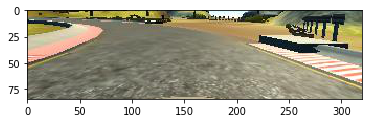

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

line = lines[5]
name = './data/IMG/'+line[0].split('/')[-1]
image = cv2.imread(name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 160*320*3
image = image[55:140,:,:] # 85*320*3

plt.imshow(image)

In [10]:
# Read the center images and angles
images = np.zeros([0, HEIGHT, WIDTH, 3])
angles = np.array([])
i = 0
for line in lines[1:]:
    
    i += 1
    if (i%1000 == 0):
        print(i)
        
    # Read the center camera image
    name = './data/IMG/'+line[0].split('/')[-1]
    image = cv2.imread(name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 160*320*3
    image = image[55:140,:,:] # 85*320*3
    image = cv2.resize(image, (WIDTH, HEIGHT)) # 68*204*3
    images = np.append(images, np.expand_dims(image,axis=0), axis=0)
    # Read the angle
    angle = float(line[3])
    angles = np.append(angles, angle)

print("shape of images is ", images.shape)
print("shape of angles is ", angles.shape)
print("\n")

# Split the images and angles into train data and valid data
images_train, images_valid, angles_train, angles_valid = train_test_split(images, angles, test_size=0.2, random_state=42)
print("shape of images_train is ", images_train.shape)
print("shape of images_valid is ", images_valid.shape)
print("shape of angles_train is ", angles_train.shape)
print("shape of angles_valid is ", angles_valid.shape)

images_train_file = './images_tarin.p'
images_valid_file = './images_valid.p'
angles_train_file = './angles_train.p'
angles_valid_file = './angles_valid.p'

# Save the pickled data
print("Saving...")
with open(images_train_file, mode='wb') as f:
    pickle.dump(images_train, f)
with open(images_valid_file, mode='wb') as f:
    pickle.dump(images_valid, f)
with open(angles_train_file, mode='wb') as f:
    pickle.dump(angles_train, f)
with open(angles_valid_file, mode='wb') as f:
    pickle.dump(angles_valid, f)
print("The train and valid data has been saved")

1000
2000
3000
4000
5000
6000
7000
8000
shape of images is  (8036, 68, 204, 3)
shape of angles is  (8036,)


shape of images_train is  (6428, 68, 204, 3)
shape of images_valid is  (1608, 68, 204, 3)
shape of angles_train is  (6428,)
shape of angles_valid is  (1608,)
Saving...
The train and valid data has been saved


In [3]:
import pickle


images_train_file = './images_tarin.p'
images_valid_file = './images_valid.p'
angles_train_file = './angles_train.p'
angles_valid_file = './angles_valid.p'

# load the pickled data
print("Loading...")
with open(images_train_file, mode='rb') as f:
    images_train = pickle.load(f)
with open(images_valid_file, mode='rb') as f:
    images_valid = pickle.load(f)
with open(angles_train_file, mode='rb') as f:
    angles_train = pickle.load(f)
with open(angles_valid_file, mode='rb') as f:
    angles_valid = pickle.load(f)
print("The train and valid data has been loaded. \n")

# Confirm the shape
print("shape of images_train is ", images_train.shape)
print("shape of angles_train is ", angles_train.shape)
print("shape of images_valid is ", images_valid.shape)
print("shape of angles_valid is ", angles_valid.shape)

Loading...
The train and valid data has been loaded. 

shape of images_train is  (6428, 68, 204, 3)
shape of angles_train is  (6428,)
shape of images_valid is  (1608, 68, 204, 3)
shape of angles_valid is  (1608,)


# Augment the train data

In [6]:
# Use left and right camera
print("Adding left and right camera images...")
correction = 0.1
i = 0
for line in lines[1:]:
    
    i += 1
    if (i%1000 == 0):
        print(i)
    
    for direction in range(1, 3): # 1:left, 2:right
        # Read the left and right camera image
        name = './data/IMG/'+line[direction].split('/')[-1]
        image = cv2.imread(name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 160*320*3
        image = image[55:140,:,:] # 85*320*3
        image = cv2.resize(image, (WIDTH, HEIGHT)) # 68*204*3
        images_train = np.append(images_train, np.expand_dims(image,axis=0), axis=0)
        # Correct the angle
        if (direction == 1): # left
            angle = float(line[3])+correction
        elif (direction == 2): # right
            angle = float(line[3])-correction
        angles_train = np.append(angles_train, angle)
print("The left and right camera images have been added. \n")                    

# Confirm the shape
print("shape of images_train is ", images_train.shape)
print("shape of angles_train is ", angles_train.shape)

augmented_images_train_file = './added_lr_images_train.p'
augmented_angles_train_file = './added_lr_angles_train.p'

# Save the pickled data
print("Saving...")
with open(augmented_images_train_file, mode='wb') as f:
    pickle.dump(images_train, f, protocol=4)
with open(augmented_angles_train_file, mode='wb') as f:
    pickle.dump(angles_train, f, protocol=4)
print("The augmented train data has been saved")

Adding left and right camera images...
1000
2000
3000
4000
5000
6000
7000
8000
The left and right camera images have been added. 

shape of images_train is  (22500, 68, 204, 3)
shape of angles_train is  (22500,)
Saving...
The augmented train data has been saved


In [7]:
augmented_images_train_file = './added_lr_images_train.p'
augmented_angles_train_file = './added_lr_angles_train.p'

# load the pickled data
print("Loading...")
with open(augmented_images_train_file, mode='rb') as f:
    images_train = pickle.load(f)
with open(augmented_angles_train_file, mode='rb') as f:
    angles_train = pickle.load(f)
print("The added left and right camera train data has been loaded")

# Flip the images if the angle is not zero
print("Flipping the images...")
for i in range(len(angles_train)):
    
    if (i%1000 == 0):
        print(i)
        
    if (abs(angles_train[i]) >= 0.001):
        image_flipped = np.fliplr(images_train[i])
        images_train = np.append(images_train, np.expand_dims(image_flipped,axis=0), axis=0)
        angle_flipped = -angles_train[i]
        angles_train = np.append(angles_train, angle_flipped)
print("The flipped images have been added. \n") 

# Confirm the shape
print("shape of images_train is ", images_train.shape)
print("shape of angles_train is ", angles_train.shape)

augmented_images_train_file = './augmented_images_train.p'
augmented_angles_train_file = './augmented_angles_train.p'

# Save the pickled data
print("Saving...")
with open(augmented_images_train_file, mode='wb') as f:
    pickle.dump(images_train, f, protocol=4)
with open(augmented_angles_train_file, mode='wb') as f:
    pickle.dump(angles_train, f, protocol=4)
print("The augmented train data has been saved")

Loading...
The added left and right camera train data has been loaded
Flipping the images...
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
The flipped images have been added. 

shape of images_train is  (41491, 68, 204, 3)
shape of angles_train is  (41491,)
Saving...
The augmented train data has been saved


In [1]:
import pickle


directory = './height55-140/'

augmented_images_train_file = directory+'augmented_images_train.p'
images_valid_file = directory+'images_valid.p'
augmented_angles_train_file = directory+'augmented_angles_train.p'
angles_valid_file = directory+'angles_valid.p'

# load the pickled data
print("Loading...")
with open(augmented_images_train_file, mode='rb') as f:
    images_train = pickle.load(f)
with open(images_valid_file, mode='rb') as f:
    images_valid = pickle.load(f)
with open(augmented_angles_train_file, mode='rb') as f:
    angles_train = pickle.load(f)
with open(angles_valid_file, mode='rb') as f:
    angles_valid = pickle.load(f)
print("The augmented train data has been loaded")

# Confirm the shape
print("shape of images_train is ", images_train.shape)
print("shape of angles_train is ", angles_train.shape)
print("shape of images_valid is ", images_valid.shape)
print("shape of angles_valid is ", angles_valid.shape)

Loading...
The augmented train data has been loaded
shape of images_train is  (41491, 68, 204, 3)
shape of angles_train is  (41491,)
shape of images_valid is  (1608, 68, 204, 3)
shape of angles_valid is  (1608,)


# Flattening the distribution of train data

The average number of samples per bin is  1659


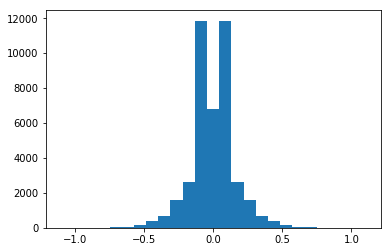

In [2]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline


n, bins, patches = plt.hist(angles_train, bins=25)
print("The average number of samples per bin is ", int(np.mean(n)))

shape of images_train is  (13993, 68, 204, 3)
shape of angles_train is  (13993,)
shape of images_valid is  (1608, 68, 204, 3)
shape of angles_valid is  (1608,)


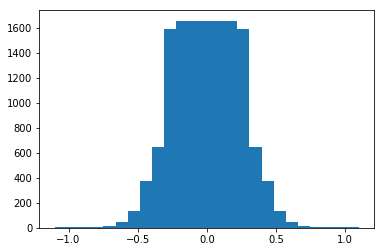

In [4]:
import random


deleted_index = np.array([])
for i in range(len(n)):
    if(n[i] > np.mean(n)):
        # Delete the images and angles over the average
        target = np.squeeze(np.argwhere((bins[i]<=angles_train) & (angles_train<=bins[i+1])))
        deleted_index = np.append(deleted_index, random.sample(list(target), len(target)-int(np.mean(n))))

images_train = np.delete(images_train, deleted_index.astype(int), 0)
angles_train = np.delete(angles_train, deleted_index.astype(int))

# Confirm the shape
print("shape of images_train is ", images_train.shape)
print("shape of angles_train is ", angles_train.shape)
print("shape of images_valid is ", images_valid.shape)
print("shape of angles_valid is ", angles_valid.shape)

_, _, _ = plt.hist(angles_train, bins=25)

# Convolutional Neural Network

In [6]:
from sklearn.utils import shuffle 
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam
from keras.regularizers import l2


def generator(images, angles, batch_size):
    while 1: # Loop forever so the generator never terminates
        for offset in range(0, len(angles), batch_size):
            X_train = images[offset:offset+batch_size]
            y_train = angles[offset:offset+batch_size]
            yield shuffle(X_train, y_train)

            
HEIGHT = 68
WIDTH = 204            
BATCH_SIZE = 256
train_generator = generator(images_train, angles_train, batch_size=BATCH_SIZE)
validation_generator = generator(images_valid, angles_valid, batch_size=BATCH_SIZE)

# Convolutional Neural Network
model = Sequential()
model.add(Lambda(lambda x: x/127.5-1.0, input_shape=(HEIGHT,WIDTH,3))) # 3@68*204
model.add(Convolution2D(24,5,5, border_mode='valid', W_regularizer=l2(0.001), activation='elu')) # 24@64*200
model.add(MaxPooling2D(pool_size=(2,2))) # 24@32*100
model.add(Convolution2D(36,5,5, border_mode='valid', W_regularizer=l2(0.001), activation='elu')) # 36@28*96
model.add(MaxPooling2D(pool_size=(2,2))) # 36@14*48
model.add(Convolution2D(48,5,5, border_mode='valid', W_regularizer=l2(0.001), activation='elu')) # 48@10*44
model.add(MaxPooling2D(pool_size=(2,2))) # 48@5*22
model.add(Convolution2D(64,3,3, border_mode='valid', W_regularizer=l2(0.001), activation='elu')) # 64@3*20
model.add(Convolution2D(64,3,3, border_mode='valid', W_regularizer=l2(0.001), activation='elu')) # 64@1*18
model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(100, W_regularizer=l2(0.001), activation='elu'))
model.add(Dense(50, W_regularizer=l2(0.001), activation='elu'))
model.add(Dense(10, W_regularizer=l2(0.001), activation='elu'))
model.add(Dense(1))

LEARNING_RATE =0.0001
model.compile(optimizer=Adam(lr=LEARNING_RATE), loss='mse')

#history_object = model.fit_generator(train_generator, samples_per_epoch= len(train_samples),
#                                     validation_data=validation_generator, nb_val_samples=len(validation_samples), 
#                                     nb_epoch=1000, verbose=1)

EPOCH = 5
EACH_EPOCH = 1
for e in range(int(EPOCH/EACH_EPOCH)):
    model.fit_generator(train_generator, samples_per_epoch=len(images_train),
                        validation_data=validation_generator, nb_val_samples=len(images_valid),
                        nb_epoch=EACH_EPOCH, verbose=1)

    print("EPOCH...", (e+1)*EACH_EPOCH)
    model.save_weights("model-weights_"+str((e+1)*EACH_EPOCH)+".h5")
    model.save("model_"+str((e+1)*EACH_EPOCH)+".h5")
    print("model_"+str((e+1)*EACH_EPOCH)+".h5 was saved.")
    model.load_weights("model-weights_"+str((e+1)*EACH_EPOCH)+".h5")
    
model.save('model.h5')

Epoch 1/1
13993/13993 [==============================] - 21s - loss: 0.4790 - val_loss: 0.4576
EPOCH... 1
model_1.h5 was saved.
Epoch 1/1
13993/13993 [==============================] - 14s - loss: 0.4534 - val_loss: 0.4308
EPOCH... 2
model_2.h5 was saved.
Epoch 1/1
13993/13993 [==============================] - 14s - loss: 0.4295 - val_loss: 0.4082
EPOCH... 3
model_3.h5 was saved.
Epoch 1/1
13993/13993 [==============================] - 14s - loss: 0.4081 - val_loss: 0.3894
EPOCH... 4
model_4.h5 was saved.
Epoch 1/1
13993/13993 [==============================] - 14s - loss: 0.3863 - val_loss: 0.3859
EPOCH... 5
model_5.h5 was saved.
Epoch 1/1
13993/13993 [==============================] - 14s - loss: 0.3655 - val_loss: 0.3506
EPOCH... 6
model_6.h5 was saved.
Epoch 1/1
13993/13993 [==============================] - 14s - loss: 0.3454 - val_loss: 0.3284
EPOCH... 7
model_7.h5 was saved.
Epoch 1/1
13993/13993 [==============================] - 14s - loss: 0.3261 - val_loss: 0.3106
EPOCH... 